## Material Science Tensile Tests

In an engineering tensile stress test, a given specimen of cross-sectional area $A_{o}$ is subjected to a given load $P$ under tension. The stress $\sigma$ generated by load $P$ over cross-sectional area $A_{o}$ is expressed as follows: 

$$\sigma = \frac{P}{A_{o}}$$ 

When the stresses on the test sample do not exceed the _elastic limit_${^1}$ the resulting strain $\epsilon$ is proportional to the stress $\sigma$:

$$\sigma = E\epsilon$$

However, if the stresses on the member do exceed the _yield strength_${^2}$ of the material, the linear relationship between stress and strain no longer holds and the specimen will begin to plastically deform. If the load $P$ continues to increase, the ultimate _tensile strength_${^3}$ will be reached and ultimately the specimen will fracture.  

<br>

---

${^1}$The region in which a material will undergo strain without plastically deforming. No permanent deformation is observed. 

${^2}$The strength of the material denoting the end of the elastic region and the beginning of the plastic region. Tensile stress at this point is $\sigma_{y}$

${^3}$The maximum strength of the material. Tensile stress at that point is called the _ultimate tensile stress_ and denoted by $\sigma_{u}$, $\sigma_{TS}$ or $\sigma_{UTS}$



In [1]:
import numpy as np                        # imports the numpy package and creates the alias np for broader control of vector arrays
import pandas as pd                       # imports the pandas package and creates the alias pd to work with data tables and lists              
import matplotlib.pyplot as plt           # imports the matplotlib.pyplot package and creates the alias plt for plotting superiority
import matplotlib.gridspec as gridspec    # imports the matplotlib.gridspec as the alias gridspec for more customizabe subplots arragement
import statistics as st                   # optional import: imports the statistics package as the alias st for statistical analysis
from scipy.stats import linregress        # imports linregress as the means to generate the slope between two given vectors of the same size
from IPython.display import Markdown      # optional line: imports markdown formatting tools       

df_st = pd.read_excel('Steel_4142.xls')   # uses the .read_excel method to extract the Steel data for excel
df_al = pd.read_excel('Al_6061.xls')      # same but now its aluminum instead



# _Steel 4142_

In [2]:
#print(df_st.to_string())      # optional execution. prints the entire excel steel data sheet on the screen

## _$\epsilon$ Data for Steel 4142_

In [3]:
# for steel: generating and storing the strain vector
strain_steel = df_st['EXT'][2:166]*0.01               # extracts the strain data from the excel data sheet
st_strain_value = pd.Series([0.195509],index=[166])   # adds the ultimate strain value to the list
strain_steel = strain_steel.append(st_strain_value)   # generates a new strain variable with all the strain data needed to genreate the plot
#strain_steel                                         # optional execution, check to see the value/s store in the variable

## _$\sigma$ Data for Steel 4142 _ 

In [4]:
# generating and storing the stress vector
d_steel = 0.5071                                          # diameter of specimen
Ao_steel = np.pi*(d_steel/2)**2                           # Area of the cross-section
#print(A0_steel)                                          # optional execution, check to see the value/s store in the variable
stress_steel = df_st['FORCE'][2:166]*(0.001/Ao_steel)     # extracts the force data from the excel data sheet and converts it to stress
st_stress_value = pd.Series([55.854765],index=[166])      # adds the breaking stress value to the list
stress_steel = stress_steel.append(st_stress_value)       # generates a new strain variable with all the stress data needed to generate the plot
#stress_steel                                             # optional execution, check to see the value/s store in the variable

## _$E$ Value for Steel 4142 _

In [5]:
# extracting the slope (elastic modulus E) from the stress vs strain plot in the elastic region
ms = linregress(strain_steel[35:102], stress_steel[35:102])   # the linregress function yields the value of the slope as the first index in the vector
#print(ms)                                                    # optional execution, check to see the value/s store in the variable
Es = ms[0]                                                    # calls the value of the first index in the vector ms and stores it in Es
#print(Es)                                                    # optional execution, check to see the value/s store in the variable
stress_steel_offs = Es*(strain_steel - 0.002)                 # yields the linear relationship that denotes the elastic region in the form y = m(x-a)
print('The Elastic modulus of Steel 4142 is %d ksi' % Es )    # prints the input line

The Elastic modulus of Steel 4142 is 29334 ksi


## _Figure 1_

<IPython.core.display.Javascript object>


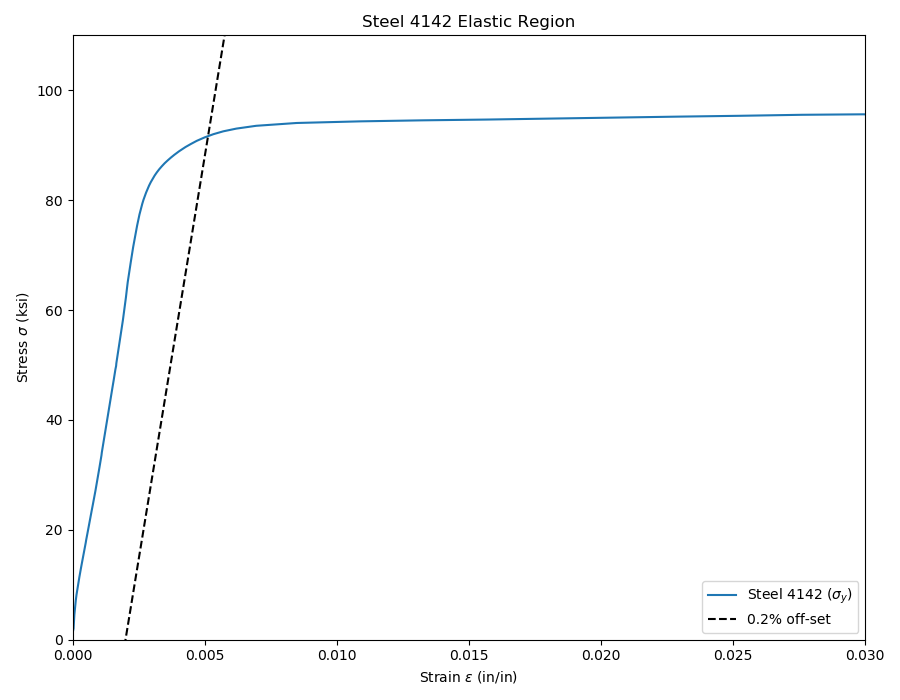

In [6]:
# genrating a plot containing the elastic region
#%matplotlib inline                                        # optional execution: keeps the plot inline instead of exporting it to seperate window
%matplotlib nbagg                                          
plt.rcParams['figure.figsize'] = (9,7)                     # determines the dimensions (size of the figure)

plt.plot(strain_steel, stress_steel,                       # plots the stress-strain curve and the linear offset (dashed line) dennoting the elastic reagion
         strain_steel, stress_steel_offs,'k--')
plt.xlabel('Strain $\epsilon$ (in/in)')                    # labels the x axis 
plt.ylabel('Stress $\sigma$ (ksi)')                        # labels the y axis 
plt.title('Steel 4142 Elastic Region')                     # titles the plot
plt.axis([0,0.03,0,110])                                   # sets the x and y axis to enphasize the elastic reagion
plt.legend(["Steel 4142 ($\sigma_{y}$)","0.2% off-set"],    # generates a legend for the plot
           loc='lower right')

plt.tight_layout()                                         # it ensures the plot will print within the grid. Prevents the plot from getting cut-off
plt.savefig('steel.png')                                   # saves a picture of the graph in .png or .jpeg format 

## $\sigma_{y}$ and $\sigma_{u}$ values for Steel 4142

In [7]:
# assigning the values for yield and tensile stress
steel_yield = 91.6517                                       # stores the value of the yield stress in the steel_yeild variable
steel_ystrain = 0.00512437                                  # stores the value of the strain corresponding to the yield strength
steel_tensile = max(stress_steel)                           # the max() function yields the max value of stress in the stress_steel vector
print('The Yeild and Tensile Strenght of Steel 4142 are %.1f ksi and %.1f ksi respectively'    # prints the input line 
      %(steel_yield, steel_tensile))   

The Yeild and Tensile Strenght of Steel 4142 are 91.7 ksi and 95.6 ksi respectively


## _Ductility Value for Steel 4142 _

In [8]:
# generating and storing the value for ductility
steel_lo =1.9783                                            # stores the value of the initial length between the reference marks on the test member 
steel_lf =2.3216                                            # stores the value of the final lenght between the reference marks after fracture
Ductility_steel =((steel_lf - steel_lo)/steel_lo)*100       # calculates and stores the value of ductility
print('The ductility of Steel 4142 is %.1f '% (Ductility_steel))  # prints the input line

The ductility of Steel 4142 is 17.4 


# _Aluminum 6061_

In [9]:
#print(df_al.to_string())      # optional execution. prints the entire excel aluminum data sheet on the screen

## _$\epsilon$ Data for Aluminium 6061_

In [10]:
# for aluminum: generating and storing the strain vector
strain_al = df_al["EXT"][1:172]*0.01                   # extracts the strain data from the excel data sheet
al_strain_value = pd.Series([0.173532],index=[172])    # adds the ultimate strain value to the list
strain_al = strain_al.append(al_strain_value)          # generates a new strain variable with all the strain data needed to genreate the plot
#strain_al                                             # optional execution, check to see the value/s store in the variable

## _$\sigma$ Data for Aluminum 6061_ 

In [11]:
# generating and storing the stress vector
d_al = 0.5065                                          # diameter of specimen 
Ao_al = np.pi*(d_al/2)**2                              # Area of the cross-section
stress_al = df_al["FORCE"][1:172]*(0.001/Ao_al)        # extracts the force data from the excel data sheet and converts it to stress
al_stress_value = pd.Series([29.107393],index=[172])   # adds the breaking stress value to the list
stress_al = stress_al.append(al_stress_value)          # generates a new strain variable with all the stress data needed to generate the plot
#stress_al                                             # optional execution, check to see the value/s store in the variable

## _$E$ Value for Aluminum 6061_

In [12]:
#extracting the slope (elastic modulus E) from the stress vs strain plot in the elastic region
ma = linregress(strain_al[25:85], stress_al[25:85])         # the linregress function yields the value of the slope as the first index in the vector
#print(ma)                                                  # optional execution, check to see the value/s store in the variable
Ea = ma[0]                                                  # calls the value of the first index in the vector ms and stores it in Es
#print(Ea)                                                  # optional execution, check to see the value/s store in the variable
stress_al_offs = Ea*(strain_al - 0.002)                     # yields the linear relationship that denotes the elastic region in the form y = m(x-a)
print('The Elastic Modulus of Aluminum 6061 is %d ksi' %Ea) # prints the input line

The Elastic Modulus of Aluminum 6061 is 9731 ksi


## _Figure 2_

<IPython.core.display.Javascript object>


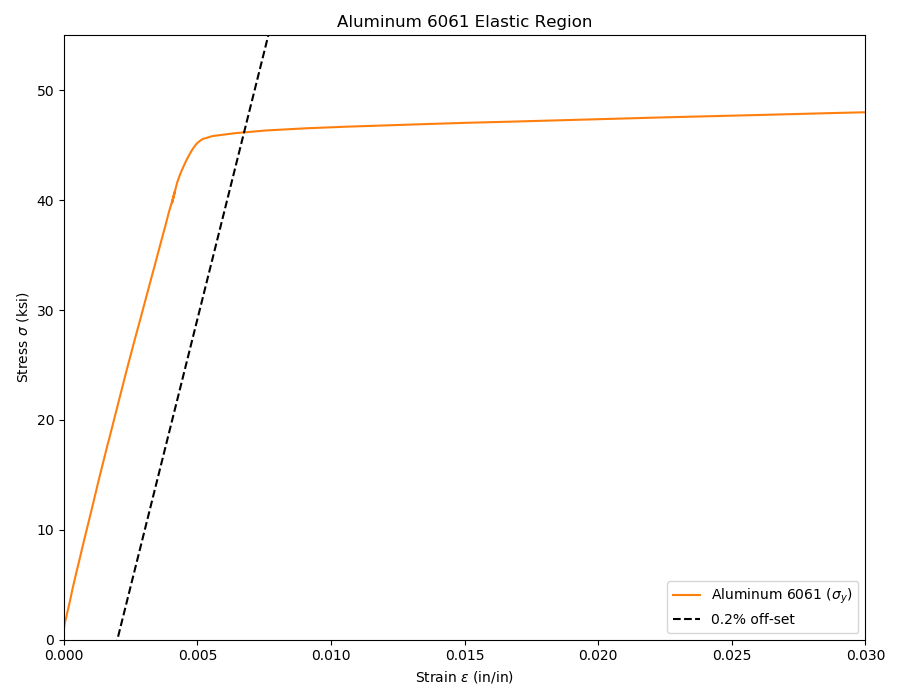

In [13]:
# genrating a plot containing the elastic region
#%matplotlib inline                                         # optional execution: keeps the plot inline instead of exporting it to seperate window
%matplotlib nbagg                                           
plt.rcParams['figure.figsize'] = (9,7)                      # determines the dimensions (size of the figure) 
plt.plot(strain_al, stress_al,'C1', strain_al, stress_al_offs,'k--') # plots the stress-strain curve and the linear offset (dashed line) dennoting the elastic reagion
plt.xlabel('Strain $\epsilon$ (in/in)')                     # labels the x axis 
plt.ylabel('Stress $\sigma$ (ksi)')                         # labesl the y axis 
plt.title('Aluminum 6061 Elastic Region')                   # titles the plot
plt.legend(["Aluminum 6061 ($\sigma_{y}$)","0.2% off-set"],  # generates a legend for the plot
           loc='lower right')
plt.axis([0,0.03,0,55])                                     # sets the x and y axis to enphasize the elastic reagion
plt.tight_layout()                                          # it ensures the plot will print within the grid. Prevents the plot from getting cut-off


plt.savefig('alu.png')                                      # saves a picture of the graph in .png or .jpeg format 

## $\sigma_{y}$ and $\sigma_{u}$ values for Aluminum 6061

In [14]:
# assigning the values for yield and tensile stress
al_yield = 46.1668                           # stores the value of the yield stress in the steel_yeild variable
al_ystrain = 0.00674403                      # stores the value of the strain corresponding to the yield strength
al_tensile = max(stress_al)                  # the max() function yields the max value of stress in the stress_steel vector 
print('The Yield and Tensile strength of Aluminum 6061 are %.1f ksi and %d ksi respectively' # prints the input line 
      %(al_yield, al_tensile))                              

The Yield and Tensile strength of Aluminum 6061 are 46.2 ksi and 47 ksi respectively


## _Ductility Value for Aluminum 6061_

In [15]:
al_Lo =1.9866 # in                           # stores the value of the initial length between the reference marks on the test member 
al_Lf =2.375  # in                           # stores the value of the final lenght between the reference marks after fracture
Ductility_al =((al_Lf - al_Lo)/al_Lo)*100    # calculates and stores the value of ductility
print('The ductility of Aluminum 6061 is %.1f percent' # prints the input line
      % (Ductility_al))

The ductility of Aluminum 6061 is 19.6 percent



## _Table 1_

|                            | <center>Steel 4142</center> | <center>_Reference_ _Steel 4142*_</center> | Aluminum 6061</center> |  <center>_Reference_ _Aluminum 6061*_</center> | 
|----------------------------|------------------------|------------------------------|----------------------|--------------------|-------------------------|
|__*Elastic Modulus (Ksi)*__ |  <center>29334</center>| <center>29900</center>    |  <center>9731</center> |         <center>10000</center>|
|__*Yield Strength (Ksi)*__  |  <center>91.7</center> |    <center>140</center>    |     <center>46.2</center>  |     <center>40.0</center> |  
|__*Tensile Strength (Ksi)*__|  <center>95.6</center>  |    <center>204.8</center>  |   <center>47.0</center>     |    <center>45.0</center> |        
|__*%Ductility*__            |  <center>17.4</center>  |    <center>16.0</center>  |      <center>19.6</center>   |   <center>17.0</center> |                        



## _Figure 3_

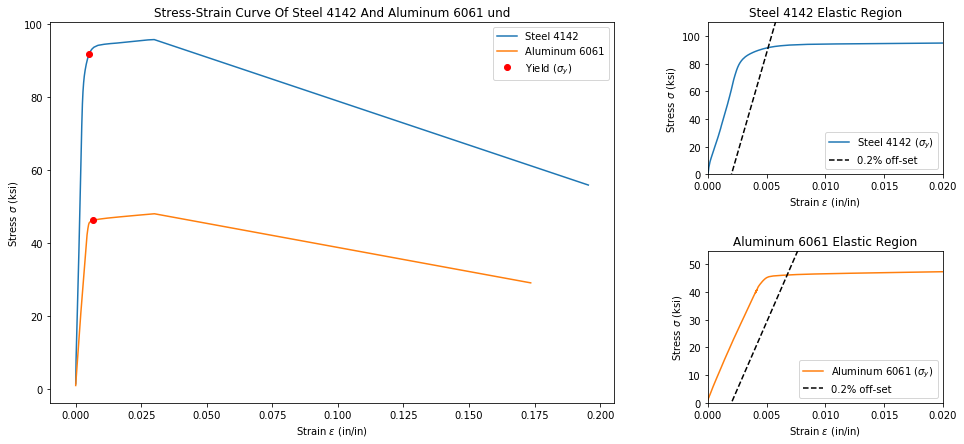

In [16]:
%matplotlib inline                               
plt.rcParams['figure.figsize'] = (16,7)           # determines the dimensions (size of the figure)


fig = plt.figure()
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.5)    #create a 2 row, 3 col grid

ax1 = plt.subplot(grid[:2, :2])                      # subplot occupies rows 1-2, cols 1-2
ax2 = plt.subplot(grid[0, 2])                        # subplot occupies row 1, col 3 
ax3 = plt.subplot(grid[1, 2])                        # subplot occupies row 2, col 3

                   
                        
ax1.plot(strain_steel, stress_steel,                          # plots the stress-strain curves and highlights the yield strength with red dots ( using the flag 'ro')
         strain_al, stress_al, 
         steel_ystrain, steel_yield, 'ro', 
         al_ystrain, al_yield, 'ro')                             # plots the data and accents the aluminum line with the 'r' flag
ax1.xaxis.set_label_text('Strain $\epsilon$ (in/in)')                           # labels the x axis 
ax1.yaxis.set_label_text('Stress $\sigma$ (ksi)')                                # labesl the y axis 
ax1.set_title('Stress-Strain Curve Of Steel 4142 And Aluminum 6061 und')  # titles the plot
ax1.legend(['Steel 4142','Aluminum 6061',"Yield ($\sigma_{y}$)"])     # generates a legend


ax2.plot(strain_steel, stress_steel, strain_steel, stress_steel_offs,'k--') # plots the steel stress-strain curve with the 0.2% off-set as a dashed line (using the flag'k--')
ax2.xaxis.set_label_text('Strain $\epsilon$ (in/in)')                               # labels the x axis 
ax2.yaxis.set_label_text('Stress $\sigma$ (ksi)')                                   # labesl the y axis 
ax2.set_title('Steel 4142 Elastic Region')                                # titles the plot 
ax2.axis([0,0.02,0,110])                                                  # sets the x and y limits to enphasize the elastic reagion
ax2.legend(["Steel 4142 ($\sigma_{y}$)","0.2% off-set"],    # generates a legend for the plot
           loc='lower right')



ax3.plot(strain_al, stress_al,'C1', strain_al, stress_al_offs,'k--')  # plots the aluminum stress-strain curve with the 0.2% off-set as a dashed line (using the flag'k--')
ax3.xaxis.set_label_text('Strain $\epsilon$ (in/in)')                               # labels the x axis 
ax3.yaxis.set_label_text('Stress $\sigma$ (ksi)')                                   # labesl the y axis 
ax3.set_title('Aluminum 6061 Elastic Region')                             # titles the plot 
ax3.axis([0,0.02,0,55]) # sets the x and y limits to enphasize the elastic reagion
ax3.legend(["Aluminum 6061 ($\sigma_{y}$)","0.2% off-set"],  # generates a legend for the plot
           loc='lower right')


#plt.savefig("run.png")     
plt.show()